### Prediction of survive Titanic passengers 
use more data (transform string Sex to int, use all data to calculating the median, including test etc.)

Import required libs

In [220]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Enlarge number of displayed rows DataFrame

In [221]:
pd.options.display.max_rows = 999
pd.options.display.max_rows

999

Read file with training data

In [222]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [223]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [224]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [226]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Preparig data

In [227]:
res = pd.DataFrame(test.PassengerId)

Delete columns with unusable data

In [228]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

Median age from both data files 

In [229]:
train.loc[train.Age.isnull(), 'Age'] = test.loc[test.Age.isnull(), 'Age'] = pd.concat([
    train[~train.Age.isnull()]['Age'], 
    test[~test.Age.isnull()]['Age']
]).median()

In [230]:
train.loc[train.Embarked.isnull(), 'Embarked'] = test.loc[test.Embarked.isnull(), 'Embarked'] = 'S'

In [231]:
dictEmbarked = dict(zip(list(train.Embarked.unique()), [0, 1, 2]))
dictEmbarked

{'C': 1, 'Q': 2, 'S': 0}

In [232]:
train.Embarked = train.Embarked.map(dictEmbarked)
test.Embarked = test.Embarked.map(dictEmbarked)

In [233]:
train.Embarked.head(3)

0    0
1    1
2    0
Name: Embarked, dtype: int64

In [234]:
train.Sex = train.Sex.apply(lambda x: 0 if x == 'female' else 1)
test.Sex = test.Sex.apply(lambda x: 0 if x == 'female' else 1)

# dictSex = dict(zip(list(train.Sex.unique()), [0, 1]))
# train.Sex = train.Sex.map(dictSex)

In [235]:
train.Cabin = train.Cabin.apply(lambda x: 1 if type(x) == str else 0)
test.Cabin = test.Cabin.apply(lambda x: 1 if type(x) == str else 0)

Cost categories of tickets

In [236]:
train['Fare'] = pd.cut(train['Fare'], 
        4, 
        labels=[0, 1, 2, 3]
       ).astype(int)

In [237]:
test.Fare = pd.cut(test['Fare'], 
        4, 
        labels=[0, 1, 2, 3]
       ).astype(int)

Age categories

Table 1.12. http://www.psychologos.ru/articles/view/psihologiya-vzroslosti-e.-p.-ilin

In [238]:
train['Age'] = pd.cut(train['Age'],
#        6,
       (0, 15, 21, 31, 51, 61, 130),
        labels=[0, 1, 2, 3, 4, 5]
       ).astype(int)

In [239]:
test['Age'] = pd.cut(test['Age'],
#        6,
       (0, 15, 21, 31, 51, 61, 130),
        labels=[0, 1, 2, 3, 4, 5]
       ).astype(int)

In [240]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,2,1,0,0,0,0
1,1,1,0,3,1,0,0,1,1
2,1,3,0,2,0,0,0,0,0
3,1,1,0,3,1,0,0,1,0
4,0,3,1,3,0,0,0,0,0


In [241]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Cabin       891 non-null int64
Embarked    891 non-null int64
dtypes: int64(9)
memory usage: 62.7 KB


In [242]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,3,0,0,0,0,2
1,3,0,3,1,0,0,0,0
2,2,1,5,0,0,0,0,2
3,3,1,2,0,0,0,0,0
4,3,0,2,1,1,0,0,0


In [243]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
Cabin       418 non-null int64
Embarked    418 non-null int64
dtypes: int64(8)
memory usage: 26.2 KB


Learning

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
y = train.Survived

In [246]:
train = train.drop(['Survived'], axis=1)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(
    train,
    y,
    test_size=0.33,
    random_state=42
)

In [248]:
# from sklearn.linear_model import LogisticRegression

In [249]:
# lr = LogisticRegression()

In [250]:
# lr.fit(X_train, y_train)
# pred = lr.predict_proba(X_test)
# pred[:,1]

In [251]:
import xgboost as xgb

In [252]:
brmod = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [253]:
# brmod = xgb.XGBClassifier(n_estimators= 2000,
#                              max_depth= 4,
#                              min_child_weight= 2,
#                              #gamma=1,
#                              gamma=0.9,                        
#                              subsample=0.8,
#                              colsample_bytree=0.8,
#                              objective= 'binary:logistic',
#                              nthread= -1,
#                              scale_pos_weight=1
#                          ).fit(X_train, y_train)

In [254]:
brpred = brmod.predict(X_test)

In [255]:
brpred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [256]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, 
                                         brpred)
#                                          bcpred)

(-0.01, 1.01)

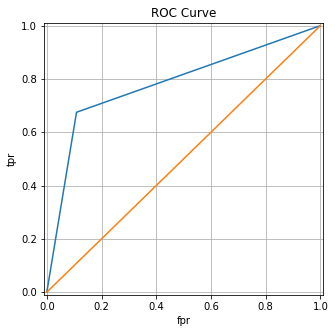

In [257]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [258]:
# lr.fit(train, y)
brmod.fit(train, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [259]:
# pred2 = lr.predict(test)
brpred2 = brmod.predict(test)

In [260]:
brpred2

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [261]:
res.insert(1, 'Survived', brpred2)

In [262]:
res.to_csv('predict2.csv', index=False)

In [263]:
# pred2proba = lr.predict_proba(test)

In [264]:
# fpr2, tpr2, thresholds2 = metrics.roc_curve(test, pred2proba[:,1])